In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('Effector_Table.xlsx')
data.head()

,VIC,Polyfunctionality,huADCP,mADCP,huADNP,mADNP,NK cell: CD107a,NK cell: IFNg,NK cell: MIP-1b
0,1,6,43.32,73.93,154.45,40.68,33.39,32.10,56.48
1,2,6,25.58,66.50,126.64,35.44,40.54,39.10,74.28
2,3,2,38.01,45.89,16.45,39.01,8.98,5.95,15.10
3,4,6,39.95,62.92,101.97,31.96,45.94,41.15,84.93
4,5,2,51.91,44.98,19.28,32.63,9.53,6.37,16.39


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   VIC                167 non-null    int64  
 1   Polyfunctionality  167 non-null    int64  
 2   huADCP             167 non-null    float64
 3   mADCP              167 non-null    float64
 4   huADNP             167 non-null    float64
 5   mADNP              167 non-null    float64
 6   NK cell: CD107a    167 non-null    float64
 7   NK cell: IFNg      167 non-null    float64
 8   NK cell: MIP-1b    167 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 11.9 KB


There are no null values present

In [4]:
data.describe()

,VIC,Polyfunctionality,huADCP,mADCP,huADNP,mADNP,NK cell: CD107a,NK cell: IFNg,NK cell: MIP-1b
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,86.017964,3.065868,32.681677,49.726168,34.271796,42.057126,14.659042,11.891078,25.867605
std,49.895248,1.859971,11.292720,16.213556,27.658576,10.738238,12.608464,13.727863,18.842298
min,1.000000,0.000000,12.240000,17.200000,4.250000,0.000000,-0.320000,-0.290000,-1.810000
25%,42.500000,2.000000,25.140000,38.695000,19.180000,34.715000,8.670000,5.855000,17.105000
50%,87.000000,3.000000,31.650000,46.540000,25.930000,40.440000,10.610000,6.370000,19.200000
75%,128.500000,4.000000,38.765000,59.670000,41.910000,47.015000,13.375000,10.200000,24.830000
max,171.000000,7.000000,67.890000,115.930000,154.450000,77.220000,72.940000,72.900000,103.260000


## Distribution Plots

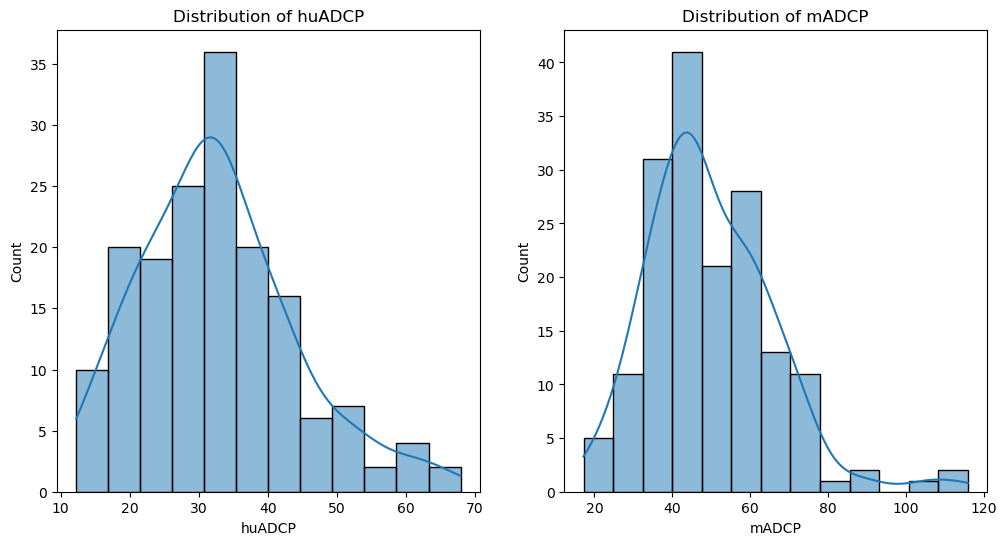

In [6]:
# visualizing distributions of a few selected columns
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['huADCP'], kde=True)
plt.title('Distribution of huADCP')

plt.subplot(1, 2, 2)
sns.histplot(data['mADCP'], kde=True)
plt.title('Distribution of mADCP')
plt.show()

### Insights from distribution plots
**Skewness:** The distributions for `huADCP` and `mADCP` are right-skewed, indicating the presence of outliers with very high values. This might affect statistical tests and could be indicative of specific samples or conditions with high assay activity.

## Correlation Matrix

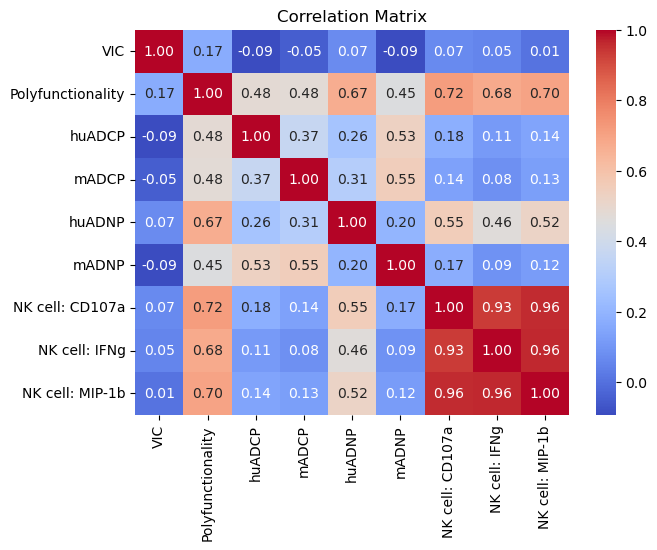

In [11]:
# Correlation heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Insights from correlation matrix

1. **High Correlations:** 
    * `NK cell: CD107a`, `NK cell: IFNg`, and `NK cell: MIP-1b` show very high correlations among each other (>=0.93). This suggests that these measurements might be capturing similar aspects of NK cell activation or function.

    * `Polyfunctionality` shows significant positive correlations with most NK cell metrics, indicating that higher polyfunctionality might be associated with more active or responsive NK cells.

2. Moderate Correlations:
    * `huADNP` and `mADNP` also exhibit moderately high correlations with NK cell metrics, which could suggest some shared biological pathways or effects that are detectable through both human and mouse ADNP assays.
    * `Polyfunctionality` has moderate to high correlations with various assays (`huADCP`, `mADCP`, `huADNP`), suggesting that cells with higher polyfunctionality tend to have higher activity in these assays.



## Outlier Detection and Handling

In [12]:
# Detect outliers using the Interquartile Range (IQR) method
Q1 = data['huADCP'].quantile(0.25)
Q3 = data['huADCP'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['huADCP'] < lower_bound) | (data['huADCP'] > upper_bound)]

# Handling outliers by capping
data['huADCP_capped'] = data['huADCP'].apply(lambda x: min(upper_bound, max(x, lower_bound)))

## Data Transformation

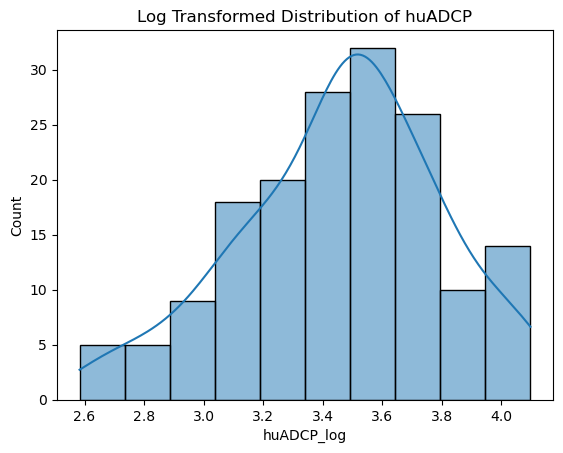

In [13]:
# Log transformation to normalize data
data['huADCP_log'] = np.log1p(data['huADCP_capped'])

# Visualize the transformed distribution
plt.figure()
sns.histplot(data['huADCP_log'], kde=True)
plt.title('Log Transformed Distribution of huADCP')
plt.show()

## Normality Test

In [16]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test for normality
stat, p_value = shapiro(data['huADCP_log'])
print(f'Shapiro-Wilk test statistics={stat}, p-value={p_value}')

# Interpretation
alpha = 0.05
if p_value > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Shapiro-Wilk test statistics=0.9814316630363464, p-value=0.024614309892058372
Sample does not look Gaussian (reject H0)


The result of the Shapiro-Wilk test suggests that even after the log transformation, the distribution of `huADCP` does not perfectly follow a normal distribution, as the p-value is below the usual significance level (0.05), leading to rejection of the null hypothesis of normality

## Box-Cox Transformation

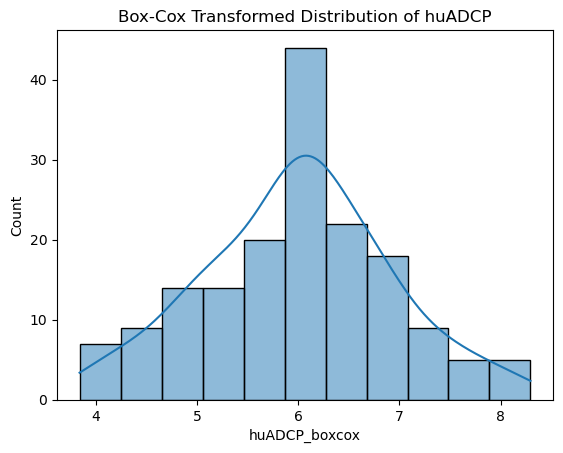

In [17]:
from scipy.stats import boxcox

# Applying Box-Cox Transformation (data must be positive)
data['huADCP_positive'] = data['huADCP'] + 1  # Shift data to positive if there are zero or negative values
data['huADCP_boxcox'], fitted_lambda = boxcox(data['huADCP_positive'])

# Visualize the Box-Cox transformed distribution
plt.figure()
sns.histplot(data['huADCP_boxcox'], kde=True)
plt.title('Box-Cox Transformed Distribution of huADCP')
plt.show()

## Regression Analysis

In [19]:
## Linear Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Preparing data
X = data.drop('Polyfunctionality', axis=1) # Features
y = data['Polyfunctionality']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}, R^2 Score: {r2}')

Mean Squared Error: 0.8502163140838976, R^2 Score: 0.7881788665773738


In [20]:
## Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a Random Forest Regressor object
rf_model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)

# Fitting the model
rf_model.fit(X_train, y_train)

# Making predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluating the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest Regression Mean Squared Error: {mse_rf}')
print(f'Random Forest Regression R^2 Score: {r2_rf}')


Random Forest Regression Mean Squared Error: 0.22374705882352935
Random Forest Regression R^2 Score: 0.9442561206896551


### Feature Importance

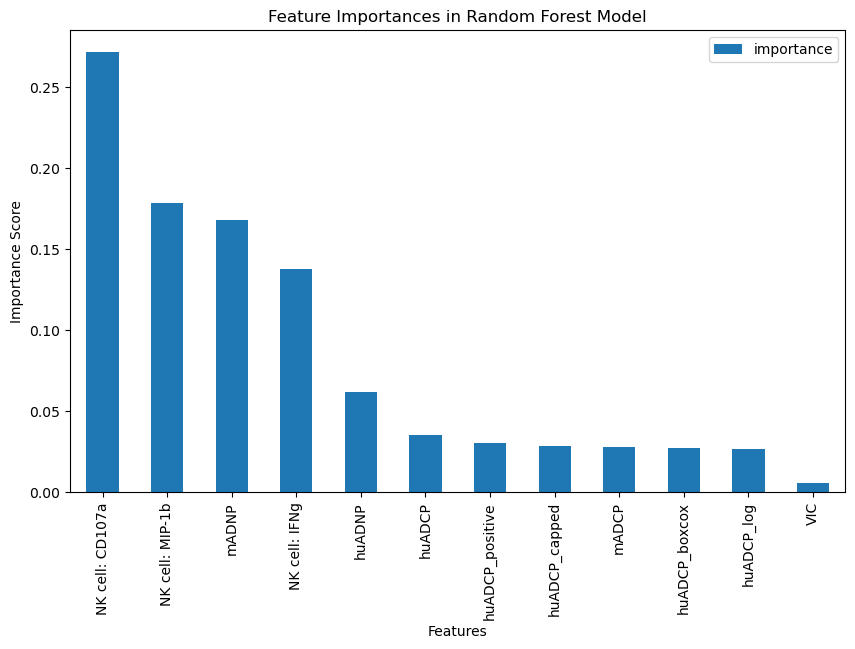

In [21]:
# Extract feature importances
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', 
                                                                       ascending=False)

# Plot feature importances
feature_importances.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importances in Random Forest Model')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.show()

In [22]:
## XGBoost

import xgboost as xgb

# Initialize the XGBoost Regressor
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                          max_depth = 5, alpha = 10, n_estimators = 100)

# Fit the regressor to the training set
xg_reg.fit(X_train, y_train)

# Predict the model's performance on the test set
y_pred_xgb = xg_reg.predict(X_test)

# Evaluate the performance
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f'XGBoost Regression Mean Squared Error: {mse_xgb}')
print(f'XGBoost Regression R^2 Score: {r2_xgb}')


XGBoost Regression Mean Squared Error: 0.26308270492592434
XGBoost Regression R^2 Score: 0.9344561192037999


## Saving the model

In [23]:
import joblib

# Assuming 'model' is your final model
joblib.dump(xg_reg, 'xgboost_model.joblib')


['xgboost_model.joblib']

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   VIC                167 non-null    int64  
 1   Polyfunctionality  167 non-null    int64  
 2   huADCP             167 non-null    float64
 3   mADCP              167 non-null    float64
 4   huADNP             167 non-null    float64
 5   mADNP              167 non-null    float64
 6   NK cell: CD107a    167 non-null    float64
 7   NK cell: IFNg      167 non-null    float64
 8   NK cell: MIP-1b    167 non-null    float64
 9   huADCP_capped      167 non-null    float64
 10  huADCP_log         167 non-null    float64
 11  huADCP_positive    167 non-null    float64
 12  huADCP_boxcox      167 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 17.1 KB
